In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from heapq import nlargest
import string
from nltk.corpus import stopwords
import nltk

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# load data
path_to_data = '/content/drive/My Drive/Colab Notebooks/INFO 498 BTS and Kpop/lyrics-v5.csv'
lyrics_data = pd.read_csv(path_to_data)
lyrics_data.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False


In [113]:
# data cleaning
lyrics_data = lyrics_data[~lyrics_data['lyrics'].isna()]

lyrics = lyrics_data['lyrics']

In [114]:
# convert list into str
for idx in lyrics.index:
  if type(lyrics[idx]) == list:
    lyrics[idx] = str(lyrics[idx]).translate(str.maketrans('', '', string.punctuation))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


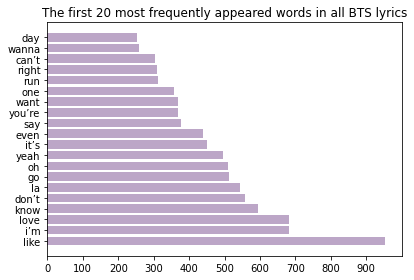

In [115]:
# the first 20 most frequently appeared words in all lyrics
word_count = {}
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
for song in lyrics:
  # remove punctuation in lyrics
  song = song.translate(str.maketrans('', '', string.punctuation))
  words = song.split()
  for word in words:
    if word.lower() not in sw_nltk:
      if word in word_count:
        word_count[word] += 1
      else:
        word_count[word] = 1
  # sort and then get first 20
  most20_appeared = dict(nlargest(20, word_count.items(), key=lambda i: i[1]))

# make a bar chart
y_pos = np.arange(len(most20_appeared.keys()))
plt.barh(y_pos, most20_appeared.values(), color='#BCA6C7')
plt.yticks(y_pos, most20_appeared.keys())
plt.xticks(np.arange(0, max(most20_appeared.values()), 100))
plt.title('The first 20 most frequently appeared words in all BTS lyrics')
plt.tight_layout()
#plt.savefig('./img/First_20_words.png')

In [131]:
album_songs_df = (lyrics_data['eng_album_title'].value_counts()).to_frame().reset_index()
album_songs_df.rename(columns={'index': 'eng_album_title', 'eng_album_title': 'number_of_songs'})
album_songs_df.head()

,index,eng_album_title
0,Love Yourself: Answer,27
1,The Most Beautiful Moment In Life: Young Forever,23
2,MAP OF THE SOUL: 7,21
3,You Never Walk Alone,18
4,WINGS,15


In [37]:
from wordcloud import WordCloud

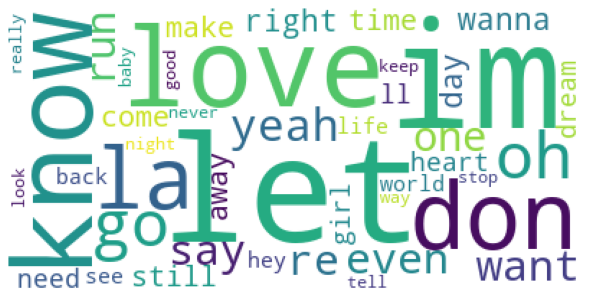

In [98]:
most30_appeared = dict(nlargest(50, word_count.items(), key=lambda i: i[1]))

most30_appeared_string = " ".join(list(most30_appeared.keys()))

wordcloud = WordCloud(background_color ='white',
                      collocations=False,
                      min_font_size = 10).generate(most30_appeared_string)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()